In [1]:
import numpy as np

Import .py functions

In [2]:
from Simulators import BanditSimulator
from Samplers import StandardThomspon

Test bandit algorithm

In [3]:
# Input bandit probabilities
True_bandit_probs = np.array([0.3, 0.60, 0.75])

# Simulate the bandits
bandits = BanditSimulator(True_bandit_probs)

# Select sampling algorithm
bandit_algo = StandardThomspon(bandits)

If you want to simply run the bandit algorithm, do:

In [4]:
n_pulls = 100
bandit_algo.sample_bandits(n_pulls)

You can check the trials with:

In [5]:
bandit_algo.trials

array([ 6., 31., 63.])

The successes with:

In [6]:
bandit_algo.wins

array([ 2., 20., 46.])

And the choices

In [7]:
bandit_algo.choices

array([0., 0., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 0., 0., 1., 2., 0., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1.,
       0., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1.])

Plot expected value of regret. For this we repeat the experiment `n_trials` times and calculate the expected value of the regret at each pull. For large values of `n_pulls` and `n_trials`, this takes a couple minutes.

In [8]:
# Total Regret after n pulls:
def regret(probabilities, choices):  
  w_opt = probabilities.max()
  return(w_opt - probabilities[choices.astype(int)]).cumsum()

# Cumulative regret:

n_pulls = 1000 # number pulls for a trial
n_trials = 200 # number of trials/times we repeat the experiment to get E[regret]
expected_total_regret = np.zeros(n_pulls)
for i in range(n_trials):
    bandit_algo.initialize() # reset these variables to their blank states
    bandit_algo.sample_bandits(n_pulls)
    regret_this_trial = regret(True_bandit_probs, bandit_algo.choices)
    expected_total_regret += regret_this_trial
                                                

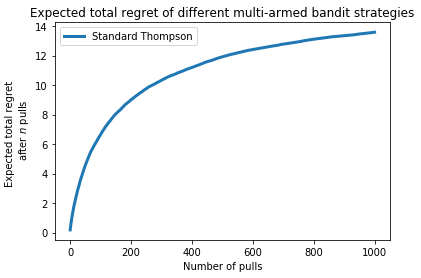

In [16]:
import matplotlib.pyplot as plt

plt.plot(expected_total_regret/n_trials, lw =3,
          label = "Standard Thompson")

plt.title("Expected total regret of different multi-armed bandit strategies")
plt.xlabel("Number of pulls")
plt.ylabel("Expected total regret \n after $n$ pulls")
plt.legend(loc="upper left");
plt.show()